<h1>Linear Regression to Analyse Car Prices</h1>

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
# reading data into the dataframe
dataset = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# 205 observations with 26 variables
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
# all the rows are non null
dataset.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

<b>Cleaning the column CarName - </b>

In [6]:
# splitting on '-'
dataset['CarName'] = dataset['CarName'].apply(lambda x:x.split('-')[0] if ('-' in x) else x.split(' ')[0])

In [7]:
# looking at the unique values
dataset['CarName'].unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu MU',
       'isuzu D', 'jaguar', 'maxda', 'mazda', 'mazda rx', 'buick',
       'mercury', 'mitsubishi', 'Nissan', 'nissan gt', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'porcshce', 'renault', 'saab',
       'subaru', 'toyota', 'toyouta', 'vokswagen', 'volkswagen', 'vw',
       'volvo'], dtype=object)

In [8]:
# lowercasing them all so that casing does not lead to uniqueness
dataset['CarName'] = dataset['CarName'].apply(lambda x:x.split(' ')[0].lower())

In [9]:
dataset['CarName'].unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'maxda', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'porcshce', 'renault',
       'saab', 'subaru', 'toyota', 'toyouta', 'vokswagen', 'volkswagen',
       'vw', 'volvo'], dtype=object)

In [10]:
# clubbing categories where spelling was leading to uniqueness
dataset.replace({'CarName' : {'maxda':'mazda','vokswagen':'volkswagen','vw':'volkswagen','porcshce':'porsche','toyouta':'toyota'}},inplace=True)

In [11]:
# finally got the unique brand names
dataset['CarName'].unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

In [12]:
dataset.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

<b>Visualising the relationship between numeric independent variables and the target variable(price) - </b>

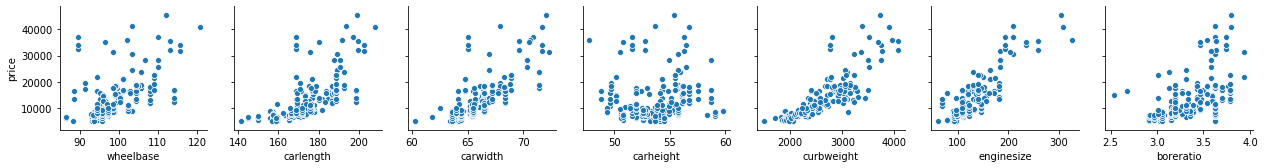

In [13]:
sns.pairplot(data=dataset,y_vars=['price'],x_vars=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio'])

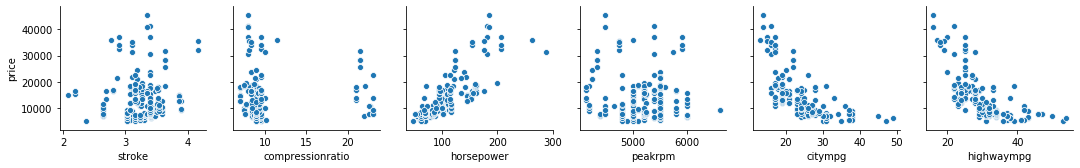

In [14]:
sns.pairplot(data=dataset,y_vars=['price'],x_vars=['stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg'])

From the EDA above, we can somewhat see that which variables have a linear relationship with price and which do not - 

Significant - horsepower,curbweight,enginesize,citympg,car width,highwaympg,carlength<br><br>
Insignificant - wheelbase,compressionratio,stroke,peakrpm,carheight,boreratio

<b>Visualising relationship between categorical independent variable and target variable(price)</b> - 

In [15]:
cat_variables = ['symboling','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']

In [16]:
# defining a function which allows me to plot a box plot for  categorical variable vs price
def cat_visualisation(variable):
    sns.boxplot(data=dataset,y='price',x=variable)

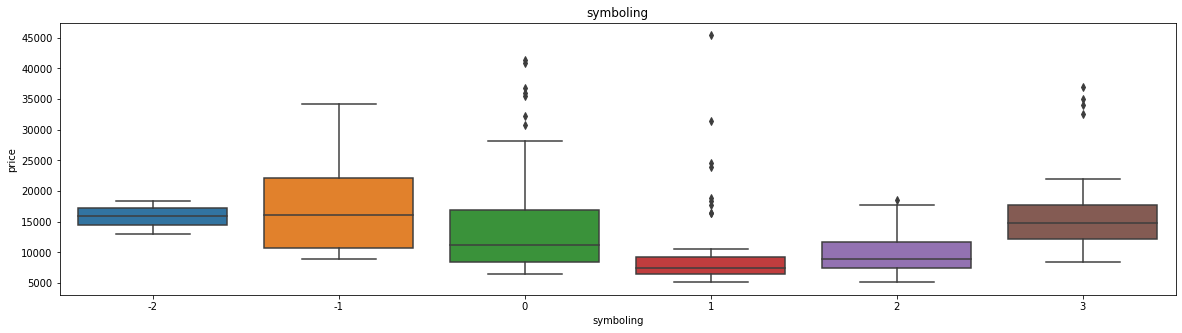

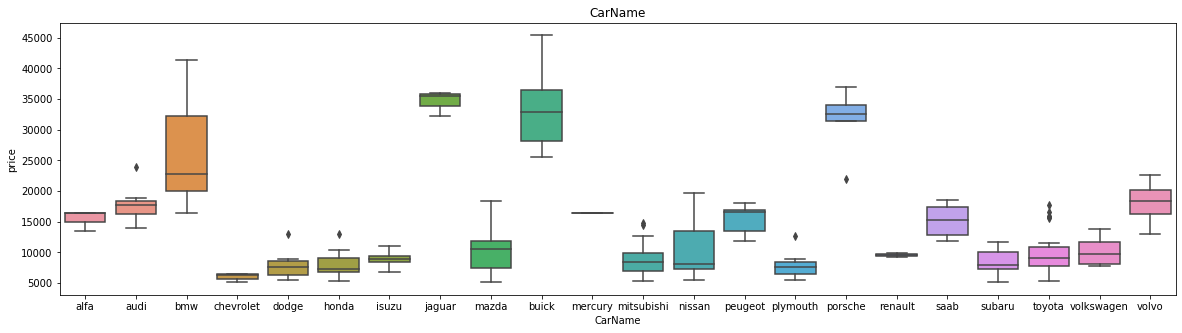

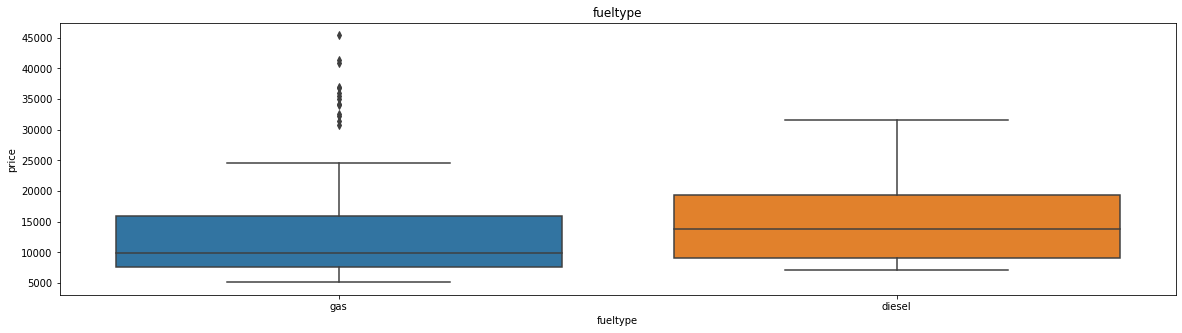

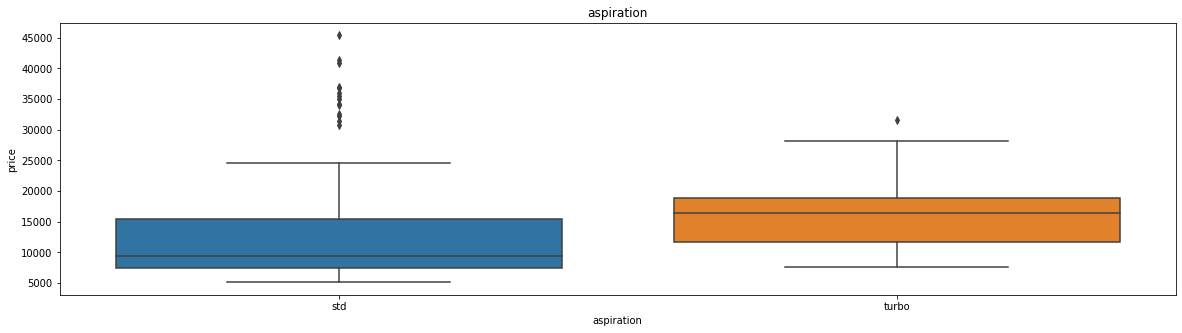

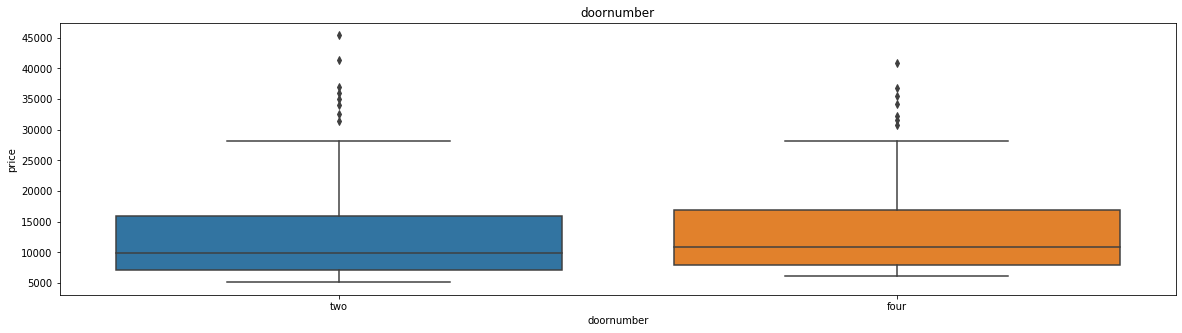

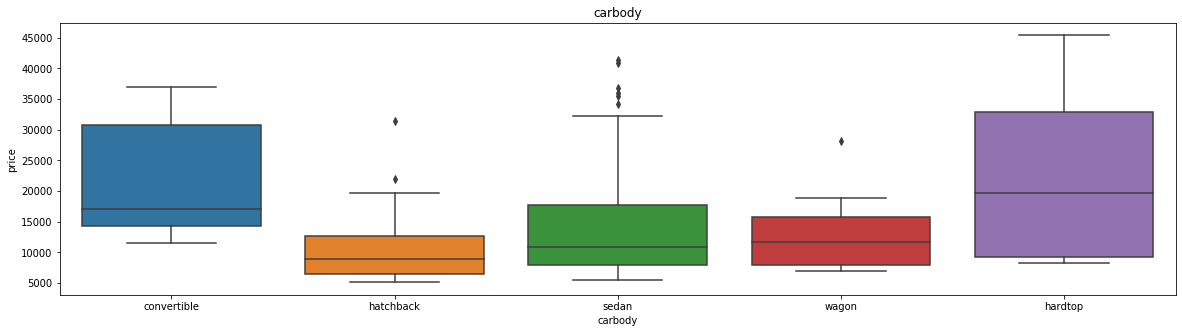

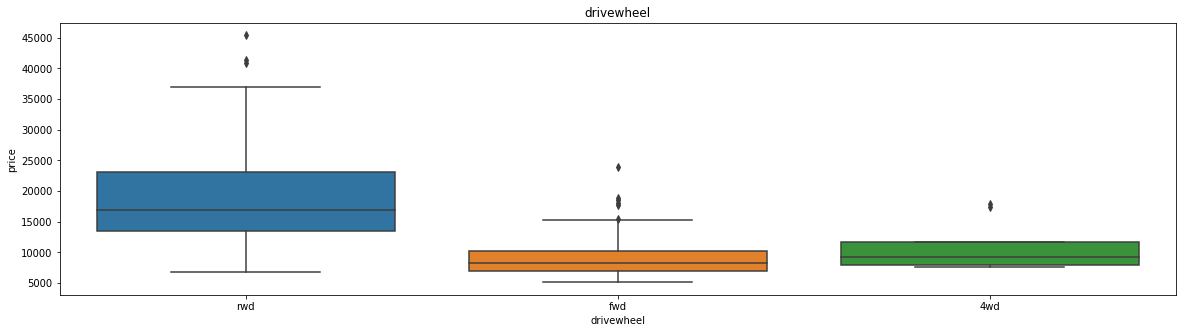

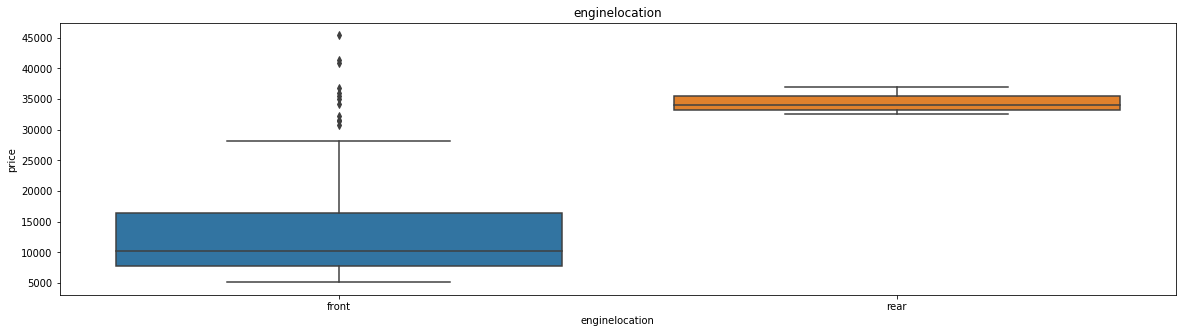

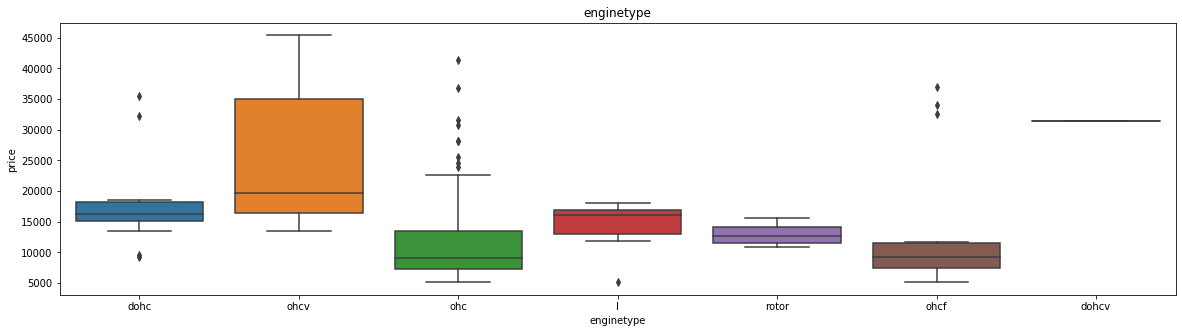

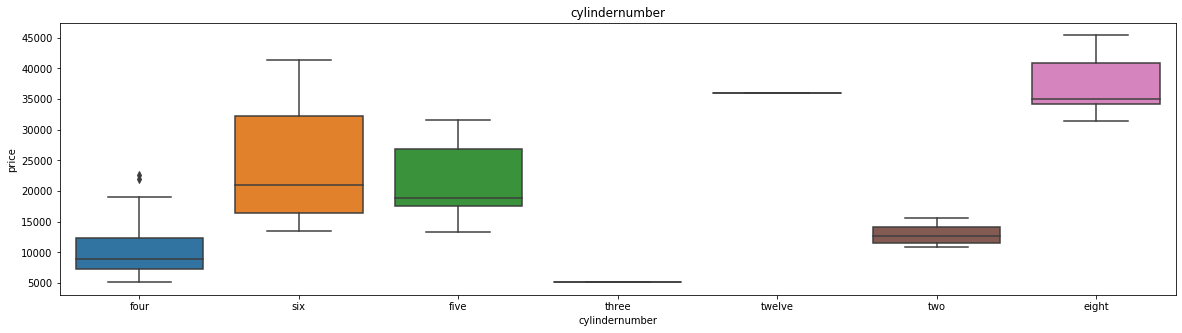

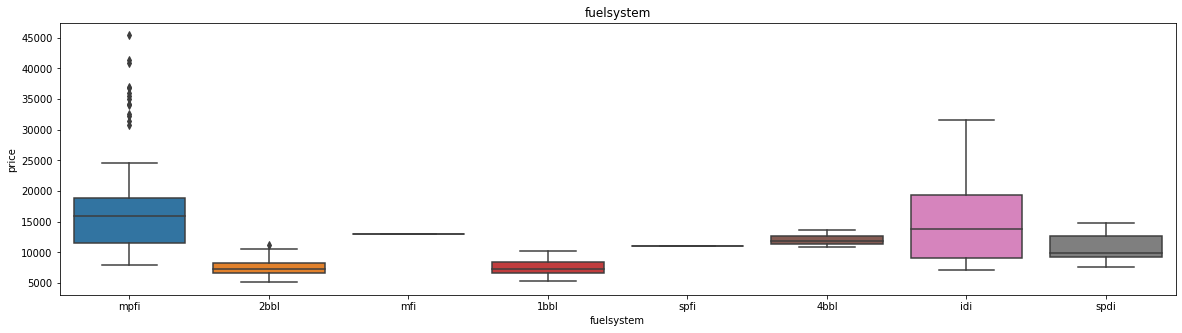

In [17]:
# plotting all plots for all the categorical variables at one
for i in cat_variables:
    plt.figure(figsize=(20,5))
    plt.title(i)
    cat_visualisation(i)

From the EDA above we can somewhat see which variables have a linear relationship with price/target variable -</br></br> 

engine location, engine type, drive wheel and cylinder number

<b>One Interesting Observation which can be made from the different car brands we plotted with price - </b>

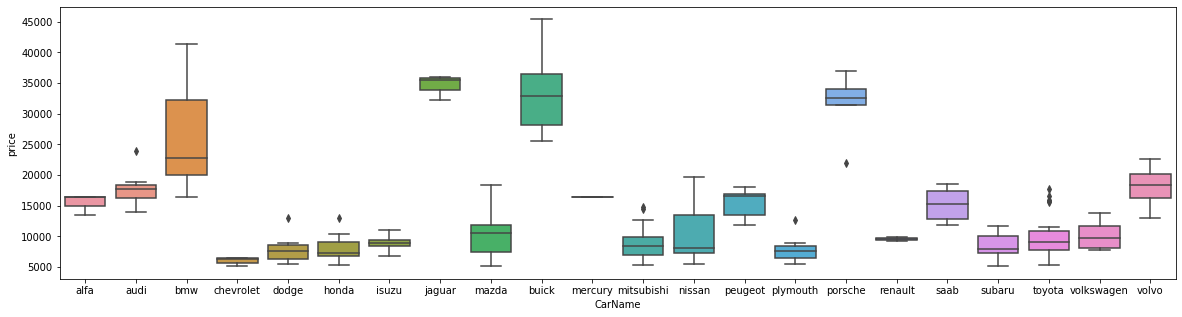

In [18]:
plt.figure(figsize=(20,5))
cat_visualisation('CarName')

<b>The price band of 18000 to 25000 seems to have very few cars - just from bmw. Hence the chinese car company can place a car in this band to have the least possible competitors</b>

<b>Creating a derived variable - <font color='red'>avg_mpg</font></b>. The two variables city mpg and highway mpg signify the same thing - the mileage of the car. If we take these 2 variables seperately, they will be highly collinear to each other and hence it is better to derive a single variable from them.

In [19]:
dataset['avg_mpg'] = (dataset['citympg']+dataset['highwaympg'])/2

In [20]:
dataset.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'avg_mpg'],
      dtype='object')

<b>Significant variables after doing EDA with both categorical and numerical variables - </b>

In [21]:
#Total significant variables
sig_vars = ['horsepower','curbweight','enginesize','carwidth','avg_mpg','carlength','enginelocation','enginetype','drivewheel','cylindernumber']

Creating a heatmap to visualise the correlations between variables

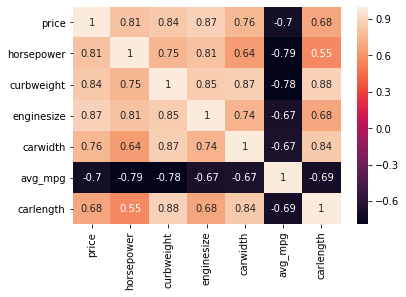

In [22]:
sns.heatmap(dataset[['price']+sig_vars].corr(),annot=True)

<b>A thing to notice -  the independent variables are highly correlated to one another and so multicollinearity will be expected. VIF values would be helpful in eliminating the correlated variables</b>

## My Approach-

1. For the First Model - Start with variables selected using EDA. Use manual backward feature elimination to arrive at the best possible selection.
2. For the Second Model - Use automated feature selection using RFE to zero down to 10 significant variables. Then use manual backward feature elimination.
3. For the final Model - Combine the variables reached using both the approaches to see if their combination gives a better model

<h3> First Approach</h3>

In [23]:
# dataset having the significant variables drawn after EDA
first_data_set = dataset[['price']+sig_vars]

In [24]:
first_data_set.head()

,price,horsepower,curbweight,enginesize,carwidth,avg_mpg,carlength,enginelocation,enginetype,drivewheel,cylindernumber
0,13495.0,111,2548,130,64.1,24.0,168.8,front,dohc,rwd,four
1,16500.0,111,2548,130,64.1,24.0,168.8,front,dohc,rwd,four
2,16500.0,154,2823,152,65.5,22.5,171.2,front,ohcv,rwd,six
3,13950.0,102,2337,109,66.2,27.0,176.6,front,ohc,fwd,four
4,17450.0,115,2824,136,66.4,20.0,176.6,front,ohc,4wd,five


<b>Working with Categorical Variables. Finding their levels and analysing if some can be clubbed together or removed if too less in number</b>

In [25]:
first_data_set['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

<b>As there are just 3 values for rear, its better to remove the independent variable entirely</b>

In [26]:
first_data_set.drop(['enginelocation'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [27]:
first_data_set['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

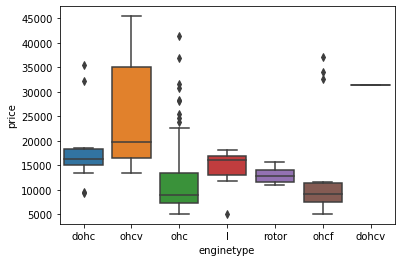

In [28]:
cat_visualisation('enginetype')

There seems to be some linear relationship if we focus on the median line. Lets remove 'dohcv' and 'rotor' as they have very few observations.

In [29]:
first_data_set.drop(first_data_set.loc[first_data_set['enginetype']=='dohcv'].index, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [30]:
first_data_set['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
Name: enginetype, dtype: int64

In [31]:
first_data_set.drop(first_data_set.loc[first_data_set['enginetype']=='rotor'].index, inplace=True)

In [32]:
first_data_set['enginetype'].value_counts()

ohc     148
ohcf     15
ohcv     13
l        12
dohc     12
Name: enginetype, dtype: int64

In [33]:
first_data_set['drivewheel'].value_counts()

fwd    120
rwd     71
4wd      9
Name: drivewheel, dtype: int64

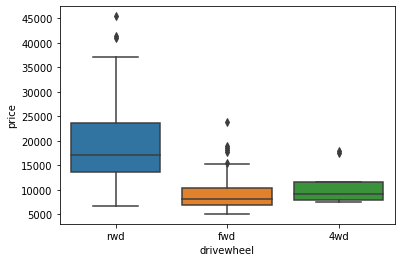

In [34]:
sns.boxplot(data=first_data_set,x='drivewheel',y='price')

<b>Clubbing 4wd with fwd as 4wd is very less in number and is similar in pricing with fwd</b>

In [35]:
first_data_set.replace({'drivewheel' : {'4wd':'fwd'}},inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


In [36]:
first_data_set['drivewheel'].value_counts()

fwd    129
rwd     71
Name: drivewheel, dtype: int64

In [37]:
first_data_set['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       4
twelve      1
three       1
Name: cylindernumber, dtype: int64

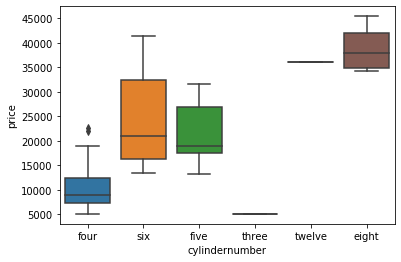

In [38]:
sns.boxplot(data=first_data_set,x='cylindernumber',y='price')

<b> Looking at the number of observations of each level and their relationship with price, I have decided to club the observation into 2 categories - cylinders greater than 4 and cylinders less than or equal to 4</b>

In [39]:
first_data_set['cylindernumber'] = first_data_set['cylindernumber'].apply(lambda x:'greater_than_4' if (x=='twelve'or x=='eight' or x=='five' or x=='six') else 'four_or_less')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
first_data_set['cylindernumber'].value_counts()

four_or_less      160
greater_than_4     40
Name: cylindernumber, dtype: int64

<b>Encoding categorical variables - </b>

In [41]:
first_data_set.replace({'cylindernumber' : {'four_or_less':0,'greater_than_4':1}},inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


In [42]:
first_data_set.head()

,price,horsepower,curbweight,enginesize,carwidth,avg_mpg,carlength,enginetype,drivewheel,cylindernumber
0,13495.0,111,2548,130,64.1,24.0,168.8,dohc,rwd,0
1,16500.0,111,2548,130,64.1,24.0,168.8,dohc,rwd,0
2,16500.0,154,2823,152,65.5,22.5,171.2,ohcv,rwd,1
3,13950.0,102,2337,109,66.2,27.0,176.6,ohc,fwd,0
4,17450.0,115,2824,136,66.4,20.0,176.6,ohc,fwd,1


In [43]:
first_data_set.replace({'drivewheel' : {'fwd':0,'rwd':1}},inplace=True)

In [44]:
first_data_set.head()

,price,horsepower,curbweight,enginesize,carwidth,avg_mpg,carlength,enginetype,drivewheel,cylindernumber
0,13495.0,111,2548,130,64.1,24.0,168.8,dohc,1,0
1,16500.0,111,2548,130,64.1,24.0,168.8,dohc,1,0
2,16500.0,154,2823,152,65.5,22.5,171.2,ohcv,1,1
3,13950.0,102,2337,109,66.2,27.0,176.6,ohc,0,0
4,17450.0,115,2824,136,66.4,20.0,176.6,ohc,0,1


<b>Creating dummy variables for the column enginetype</b>

In [45]:
status = pd.get_dummies(first_data_set['enginetype'], drop_first = True)

In [46]:
status.head()

,l,ohc,ohcf,ohcv
0,0,0,0,0
1,0,0,0,0
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0


In [47]:
first_data_set = pd.concat([first_data_set, status], axis = 1)

In [48]:
first_data_set.head()

,price,horsepower,curbweight,enginesize,carwidth,avg_mpg,carlength,enginetype,drivewheel,cylindernumber,l,ohc,ohcf,ohcv
0,13495.0,111,2548,130,64.1,24.0,168.8,dohc,1,0,0,0,0,0
1,16500.0,111,2548,130,64.1,24.0,168.8,dohc,1,0,0,0,0,0
2,16500.0,154,2823,152,65.5,22.5,171.2,ohcv,1,1,0,0,0,1
3,13950.0,102,2337,109,66.2,27.0,176.6,ohc,0,0,0,1,0,0
4,17450.0,115,2824,136,66.4,20.0,176.6,ohc,0,1,0,1,0,0


In [49]:
first_data_set.drop(['enginetype'],inplace=True,axis=1)

In [50]:
first_data_set.head()

,price,horsepower,curbweight,enginesize,carwidth,avg_mpg,carlength,drivewheel,cylindernumber,l,ohc,ohcf,ohcv
0,13495.0,111,2548,130,64.1,24.0,168.8,1,0,0,0,0,0
1,16500.0,111,2548,130,64.1,24.0,168.8,1,0,0,0,0,0
2,16500.0,154,2823,152,65.5,22.5,171.2,1,1,0,0,0,1
3,13950.0,102,2337,109,66.2,27.0,176.6,0,0,0,1,0,0
4,17450.0,115,2824,136,66.4,20.0,176.6,0,1,0,1,0,0


<h3>Training the Model</h3>

In [51]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(first_data_set, train_size = 0.7, test_size = 0.3, random_state = 100)

In [52]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 78 to 8
Data columns (total 13 columns):
price             140 non-null float64
horsepower        140 non-null int64
curbweight        140 non-null int64
enginesize        140 non-null int64
carwidth          140 non-null float64
avg_mpg           140 non-null float64
carlength         140 non-null float64
drivewheel        140 non-null int64
cylindernumber    140 non-null int64
l                 140 non-null uint8
ohc               140 non-null uint8
ohcf              140 non-null uint8
ohcv              140 non-null uint8
dtypes: float64(4), int64(5), uint8(4)
memory usage: 11.5 KB


<b>Scaling the variables so that we can compare the beta coefficients and interpret in a better way</b>

In [53]:
# Normalising the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_vars = ['horsepower', 'curbweight', 'enginesize','carwidth','carlength','avg_mpg','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [54]:
df_train.head()

,price,horsepower,curbweight,enginesize,carwidth,avg_mpg,carlength,drivewheel,cylindernumber,l,ohc,ohcf,ohcv
78,0.037715,0.093458,0.200155,0.116981,0.350427,0.534247,0.263415,0,0,0,1,0,0
3,0.218614,0.252336,0.329325,0.181132,0.504274,0.328767,0.577236,0,0,0,1,0,0
190,0.119978,0.196262,0.284329,0.181132,0.316239,0.315068,0.400000,0,0,0,1,0,0
26,0.061070,0.093458,0.194337,0.109434,0.299145,0.534247,0.263415,0,0,0,1,0,0
94,0.053368,0.098131,0.179597,0.135849,0.299145,0.520548,0.393496,0,0,0,1,0,0


In [55]:
# values lie between 0 and 1
df_train.describe()

,price,horsepower,curbweight,enginesize,carwidth,avg_mpg,carlength,drivewheel,cylindernumber,l,ohc,ohcf,ohcv
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,0.200668,0.254005,0.411429,0.246496,0.474847,0.360568,0.533577,0.342857,0.207143,0.064286,0.735714,0.071429,0.071429
std,0.199743,0.178330,0.211486,0.159364,0.187326,0.189239,0.209861,0.476369,0.406714,0.246142,0.442535,0.258464,0.258464
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.061070,0.102804,0.242630,0.135849,0.316239,0.205479,0.407317,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.127804,0.214953,0.357642,0.184906,0.435897,0.349315,0.520325,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.281988,0.322430,0.556342,0.301887,0.564103,0.479452,0.689024,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
# seperating the target variable and the independent variables
y_train = df_train.pop('price')
X_train = df_train

In [57]:
X_train.head()

,horsepower,curbweight,enginesize,carwidth,avg_mpg,carlength,drivewheel,cylindernumber,l,ohc,ohcf,ohcv
78,0.093458,0.200155,0.116981,0.350427,0.534247,0.263415,0,0,0,1,0,0
3,0.252336,0.329325,0.181132,0.504274,0.328767,0.577236,0,0,0,1,0,0
190,0.196262,0.284329,0.181132,0.316239,0.315068,0.400000,0,0,0,1,0,0
26,0.093458,0.194337,0.109434,0.299145,0.534247,0.263415,0,0,0,1,0,0
94,0.098131,0.179597,0.135849,0.299145,0.520548,0.393496,0,0,0,1,0,0


In [58]:
y_train.head()

78     0.037715
3      0.218614
190    0.119978
26     0.061070
94     0.053368
Name: price, dtype: float64

In [59]:
# importing the statsmodel library to analysise statistics
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [60]:
X_train_lm.head()

,const,horsepower,curbweight,enginesize,carwidth,avg_mpg,carlength,drivewheel,cylindernumber,l,ohc,ohcf,ohcv
78,1.0,0.093458,0.200155,0.116981,0.350427,0.534247,0.263415,0,0,0,1,0,0
3,1.0,0.252336,0.329325,0.181132,0.504274,0.328767,0.577236,0,0,0,1,0,0
190,1.0,0.196262,0.284329,0.181132,0.316239,0.315068,0.400000,0,0,0,1,0,0
26,1.0,0.093458,0.194337,0.109434,0.299145,0.534247,0.263415,0,0,0,1,0,0
94,1.0,0.098131,0.179597,0.135849,0.299145,0.520548,0.393496,0,0,0,1,0,0


In [61]:
# Create the first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [62]:
# Printing the summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     77.90
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           1.58e-52
Time:                        16:27:23   Log-Likelihood:                 176.00
No. Observations:                 140   AIC:                            -326.0
Df Residuals:                     127   BIC:                            -287.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2377      0.066     -3.

In [63]:
# Check for the VIF values of the feature variables as there will be a lot of correlation as we had seen from the heatmap
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,72.28
5,carlength,48.66
3,carwidth,47.04
2,enginesize,27.17
0,horsepower,13.06
9,ohc,12.89
4,avg_mpg,7.16
6,drivewheel,3.42
7,cylindernumber,3.09
8,l,2.75


<b>As expected, we get high VIFs. We had already seen through the correlation heatmap that the variables are highly collinear</b>

In [65]:
# dropping curbweight as it is has both high p value and vif
X = X_train.drop('curbweight',axis=1)

In [66]:
X.head()

,horsepower,enginesize,carwidth,avg_mpg,carlength,drivewheel,cylindernumber,l,ohc,ohcf,ohcv
78,0.093458,0.116981,0.350427,0.534247,0.263415,0,0,0,1,0,0
3,0.252336,0.181132,0.504274,0.328767,0.577236,0,0,0,1,0,0
190,0.196262,0.181132,0.316239,0.315068,0.400000,0,0,0,1,0,0
26,0.093458,0.109434,0.299145,0.534247,0.263415,0,0,0,1,0,0
94,0.098131,0.135849,0.299145,0.520548,0.393496,0,0,0,1,0,0


In [67]:
# Building the second model without the variable that was removed
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [68]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     85.62
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           1.70e-53
Time:                        16:27:24   Log-Likelihood:                 175.98
No. Observations:                 140   AIC:                            -328.0
Df Residuals:                     128   BIC:                            -292.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2347      0.064     -3.

<b>Hardly any change in the R square value. Shows that the variable was indeed insignificant</b>

In [69]:
# Checking VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,carwidth,44.24
4,carlength,33.73
1,enginesize,22.41
8,ohc,12.89
0,horsepower,12.49
3,avg_mpg,6.98
5,drivewheel,3.29
6,cylindernumber,3.07
10,ohcv,2.63
7,l,2.62


In [70]:
# although carwidth has the highest vif, it has very low p value. Hence removing carlength which has both high p and vif values.
X = X.drop('carlength',axis=1)

In [71]:
X.head()

,horsepower,enginesize,carwidth,avg_mpg,drivewheel,cylindernumber,l,ohc,ohcf,ohcv
78,0.093458,0.116981,0.350427,0.534247,0,0,0,1,0,0
3,0.252336,0.181132,0.504274,0.328767,0,0,0,1,0,0
190,0.196262,0.181132,0.316239,0.315068,0,0,0,1,0,0
26,0.093458,0.109434,0.299145,0.534247,0,0,0,1,0,0
94,0.098131,0.135849,0.299145,0.520548,0,0,0,1,0,0


In [72]:
# Building the third fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [73]:
# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     94.84
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           1.79e-54
Time:                        16:27:24   Log-Likelihood:                 175.92
No. Observations:                 140   AIC:                            -329.8
Df Residuals:                     129   BIC:                            -297.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2245      0.055     -4.

In [74]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,21.99
2,carwidth,21.08
7,ohc,12.86
0,horsepower,12.48
3,avg_mpg,6.98
4,drivewheel,3.19
5,cylindernumber,3.06
6,l,2.59
9,ohcv,2.45
8,ohcf,1.93


<b>although carwidth and enginesize have the highest VIF, but they have least p value and hence dropping ohc</b>

In [75]:
X = X.drop('ohc',axis=1)

In [76]:
X.head()

,horsepower,enginesize,carwidth,avg_mpg,drivewheel,cylindernumber,l,ohcf,ohcv
78,0.093458,0.116981,0.350427,0.534247,0,0,0,0,0
3,0.252336,0.181132,0.504274,0.328767,0,0,0,0,0
190,0.196262,0.181132,0.316239,0.315068,0,0,0,0,0
26,0.093458,0.109434,0.299145,0.534247,0,0,0,0,0
94,0.098131,0.135849,0.299145,0.520548,0,0,0,0,0


In [77]:
# Building the fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [78]:
# Print the summary of the model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     105.0
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           3.11e-55
Time:                        16:27:25   Log-Likelihood:                 175.26
No. Observations:                 140   AIC:                            -330.5
Df Residuals:                     130   BIC:                            -301.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1929      0.048     -4.

In [79]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,21.84
2,carwidth,15.59
0,horsepower,12.40
4,drivewheel,3.19
5,cylindernumber,3.02
3,avg_mpg,2.93
8,ohcv,1.73
6,l,1.49
7,ohcf,1.11


In [80]:
#<b>although carwidth and enginesize have the highest VIF, but they have least p value and hence dropping horsepower</b>
X = X.drop('horsepower',axis=1)

In [81]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [82]:
# Print the summary of the model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     114.7
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           2.32e-55
Time:                        16:27:25   Log-Likelihood:                 172.97
No. Observations:                 140   AIC:                            -327.9
Df Residuals:                     131   BIC:                            -301.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1417      0.041     -3.

In [83]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,16.24
1,carwidth,14.22
3,drivewheel,3.16
4,cylindernumber,3.02
2,avg_mpg,2.77
7,ohcv,1.73
5,l,1.44
6,ohcf,1.09


In [84]:
#avg_mpg has highest p value. Lets remove it
X = X.drop('avg_mpg',axis=1)

In [85]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [86]:
# Print the summary of the model
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     132.0
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           2.00e-56
Time:                        16:27:26   Log-Likelihood:                 172.93
No. Observations:                 140   AIC:                            -329.9
Df Residuals:                     132   BIC:                            -306.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1325      0.019     -6.

In [87]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,16.21
1,carwidth,10.37
2,drivewheel,3.06
3,cylindernumber,2.70
6,ohcv,1.72
4,l,1.43
5,ohcf,1.09


In [88]:
#ohcf has highest p value and highest VIF. Lets remove it
X = X.drop('ohcf',axis=1)

In [89]:
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [90]:
# Print the summary of the model
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     154.9
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           1.74e-57
Time:                        16:27:26   Log-Likelihood:                 172.80
No. Observations:                 140   AIC:                            -331.6
Df Residuals:                     133   BIC:                            -311.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1312      0.019     -6.

In [91]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,16.02
1,carwidth,10.35
2,drivewheel,3.00
3,cylindernumber,2.68
5,ohcv,1.71
4,l,1.43


In [92]:
#l has highest p value. Lets remove it
X = X.drop('l',axis=1)

In [93]:
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [94]:
# Print the summary of the model
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     185.9
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           1.83e-58
Time:                        16:27:26   Log-Likelihood:                 172.36
No. Observations:                 140   AIC:                            -332.7
Df Residuals:                     134   BIC:                            -315.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1287      0.019     -6.

In [95]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,15.02
1,carwidth,9.42
3,cylindernumber,2.59
2,drivewheel,2.50
4,ohcv,1.71


<b>Although all variables have very less p value, but the correlation between enginesize and carwidth is very high. I'll be removing carwidth because enginesize has a higher beta coefficient and hence a unit change in this variable will have a more effect on the price</b>

In [96]:
X = X.drop('carwidth',axis=1)

In [97]:
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [98]:
# Print the summary of the model
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     195.0
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           4.61e-55
Time:                        16:27:27   Log-Likelihood:                 161.32
No. Observations:                 140   AIC:                            -312.6
Df Residuals:                     135   BIC:                            -297.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0652      0.014     -4.

In [99]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,3.62
1,drivewheel,2.49
2,cylindernumber,2.49
3,ohcv,1.58


<b>All the variables have low p value and vif value and the r square is also good. Hence lets do the residual analysis.</b>

In [100]:
X_train_lm.head()

,const,enginesize,drivewheel,cylindernumber,ohcv
78,1.0,0.116981,0,0,0
3,1.0,0.181132,0,0,0
190,1.0,0.181132,0,0,0
26,1.0,0.109434,0,0,0
94,1.0,0.135849,0,0,0


<b>Predicting the price using training feature variables - </b>

In [101]:
y_train_price = lr_8.predict(X_train_lm)

In [102]:
y_train_price.head()

78     0.047027
3      0.108597
190    0.108597
26     0.039783
94     0.065136
dtype: float64

<b>Checking if the residuals are distributed normally around mean 0</b>

Text(0.5, 0, 'Errors')

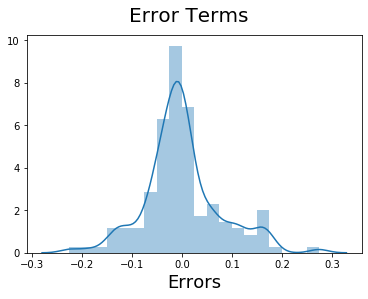

In [103]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

<b>Checking if the error terms are independent of each other</b>

Text(0, 0.5, 'Errors')

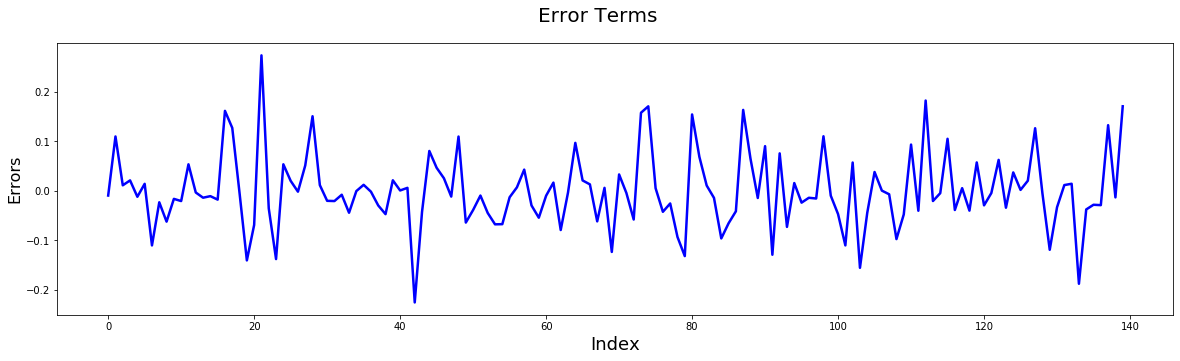

In [104]:
# Error terms
c = [i for i in range(0,140,1)]
fig = plt.figure(figsize=(20,5))
plt.plot(c,(y_train - y_train_price), color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Errors', fontsize=16)                # Y-label

<b>No pattern is observed and hence it satisfies the condition</b>

<b>Checking for homoscedasticity. That is variance in error terms is constant.</b>

Text(0, 0.5, 'Errors')

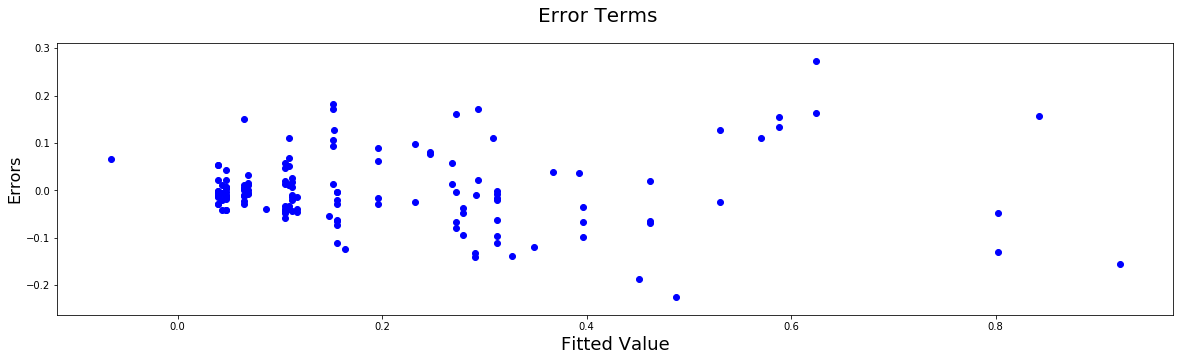

In [105]:
fig = plt.figure(figsize=(20,5))
plt.scatter(y_train_price,(y_train - y_train_price), color="blue")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Fitted Value', fontsize=18)                      # X-label
plt.ylabel('Errors', fontsize=16)                          # X-label

<b>As the error terms are not depicting a funnel, there is no order in increase or decrease of variance in error terms</b>

<h3>Lets see how the model performs on the test data</h3>

In [106]:
# features that were shortlisted after model training
X_train_lm.columns

Index(['const', 'enginesize', 'drivewheel', 'cylindernumber', 'ohcv'], dtype='object')

In [107]:
# scaling the test data features

# numeric variables
num_vars = ['horsepower', 'curbweight', 'enginesize', 'avg_mpg', 'carwidth','carlength','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [108]:
df_test.head()

,price,horsepower,curbweight,enginesize,carwidth,avg_mpg,carlength,drivewheel,cylindernumber,l,ohc,ohcf,ohcv
131,0.117866,0.196262,0.377036,0.267925,-1.211382,-2.846154,4.432877,0,0,0,1,0,0
108,0.199980,0.219626,0.662917,0.343396,-1.182114,-2.547009,4.704110,1,0,1,0,0,0
103,0.207409,0.485981,0.609775,0.452830,-1.213008,-3.273504,4.646575,0,1,0,0,0,1
96,0.058337,0.098131,0.187355,0.135849,-1.256911,-2.247863,4.117808,0,0,0,1,0,0
115,0.285200,0.228972,0.615593,0.222642,-1.182114,-3.316239,4.704110,1,0,1,0,0,0


In [109]:
df_test.describe()

,price,horsepower,curbweight,enginesize,carwidth,avg_mpg,carlength,drivewheel,cylindernumber,l,ohc,ohcf,ohcv
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.197649,0.265421,0.418845,0.262767,-1.222168,-2.742877,4.374566,0.383333,0.183333,0.050000,0.750000,0.083333,0.050000
std,0.196535,0.173471,0.183623,0.145129,0.032078,0.513863,0.314324,0.490301,0.390205,0.219784,0.436667,0.278718,0.219784
min,-0.000820,0.018692,0.128394,0.067925,-1.278049,-3.871795,3.550685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.069350,0.151869,0.305275,0.167925,-1.247154,-3.113248,4.213014,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000
50%,0.119022,0.224299,0.373739,0.230189,-1.229268,-2.846154,4.383562,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.282610,0.317757,0.570694,0.320755,-1.212602,-2.290598,4.616438,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,0.889687,0.742991,0.935609,0.932075,-1.128455,-1.521368,5.290411,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [110]:
# seperating the feature variables and the target variable
y_test = df_test.pop('price')
X_test = df_test

In [111]:
# Adding constant variable to test dataframe
# test dataframe for testing the 8th model
X_test_m8 = sm.add_constant(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [112]:
X_test_m8.columns

Index(['const', 'horsepower', 'curbweight', 'enginesize', 'carwidth',
       'avg_mpg', 'carlength', 'drivewheel', 'cylindernumber', 'l', 'ohc',
       'ohcf', 'ohcv'],
      dtype='object')

In [113]:
X_train_lm.columns

Index(['const', 'enginesize', 'drivewheel', 'cylindernumber', 'ohcv'], dtype='object')

In [114]:
# removing the features from the test dataset which are not there in the model

X_test_m8 = X_test_m8.drop(['horsepower','curbweight','carwidth', 'avg_mpg', 'carlength','l', 'ohc', 'ohcf'], axis = 1)

In [115]:
X_test_m8.head()

,const,enginesize,drivewheel,cylindernumber,ohcv
131,1.0,0.267925,0,0,0
108,1.0,0.343396,1,0,0
103,1.0,0.452830,0,1,1
96,1.0,0.135849,0,0,0
115,1.0,0.222642,1,0,0


In [116]:
# Making predictions using the eigth model

y_pred_m8 = lr_8.predict(X_test_m8)

In [117]:
# dataframing having predicted values and actual values
evaluation_df = pd.DataFrame({'y_test':y_test,'y_pred_m8':y_pred_m8})

In [118]:
evaluation_df.head()

,y_test,y_pred_m8
131,0.117866,0.191899
108,0.199980,0.312279
103,0.207409,0.348624
96,0.058337,0.065136
115,0.285200,0.196382


Text(6.799999999999997, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

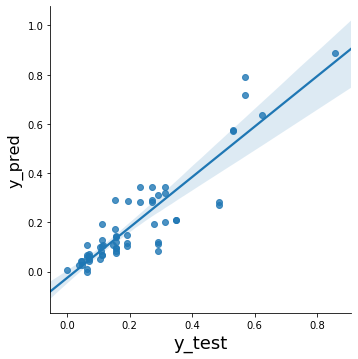

In [119]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.lmplot(y='y_test', x='y_pred_m8',data=evaluation_df)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

<h4>Finding the r square value</h4>

In [120]:
from sklearn.metrics import r2_score

In [121]:
r_squared = r2_score(y_test, y_pred_m8)

In [122]:
r_squared

0.8059634237002574

In [123]:
0.852-0.805

0.04699999999999993

<b>The R squared value on test dataset is just 0.046 less than the training dataset and hence the model is well generalised</b>

## Lets try out the Second Approach - Using RFE

In [124]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,avg_mpg
0,1,3,alfa,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,24.0
1,2,3,alfa,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,24.0
2,3,1,alfa,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,22.5
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,27.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,20.0


In [125]:
# Viewing the categorical variables
dataset[cat_variables].head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,alfa,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,alfa,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [126]:
dataset['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

<b>As it is an ordinal categorical variable, we can leave it as it is.</b>

In [127]:
dataset['CarName'].value_counts()

toyota        32
nissan        18
mazda         17
mitsubishi    13
honda         13
subaru        12
volkswagen    12
peugeot       11
volvo         11
dodge          9
bmw            8
buick          8
audi           7
plymouth       7
saab           6
porsche        5
isuzu          4
jaguar         3
chevrolet      3
alfa           3
renault        2
mercury        1
Name: CarName, dtype: int64

<b>Branding does play a role in the pricing but this will not be helpful to the chinese company as it can not do anything about it. The only benefit from the CarName analysis was in EDA where we found a band of price range, where hardly any brand was selling and this could be where the chinese company can fit its new model to prevent competition</b>

In [128]:
dataset['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

<b>data is very skewed against diesel. Hardly any number of cars in the observartion are diesel.(10%).
Splitting it into training and testing will makeit even less significant. Hence better to remove this feature from the analysis
too</b>

In [129]:
dataset['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

<b>this is also very skewed</b>

In [130]:
dataset['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [131]:
# encoding doornumber
dataset.replace({'doornumber' : {'four':1,'two':0}},inplace=True)

In [132]:
dataset[cat_variables].head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,alfa,gas,std,0,convertible,rwd,front,dohc,four,mpfi
1,3,alfa,gas,std,0,convertible,rwd,front,dohc,four,mpfi
2,1,alfa,gas,std,0,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi,gas,std,1,sedan,fwd,front,ohc,four,mpfi
4,2,audi,gas,std,1,sedan,4wd,front,ohc,five,mpfi


In [133]:
# removing them as data was very skewed against their levels of categories and also because carName could not be useful for price prediction
dataset.drop(['CarName','fueltype','aspiration'],inplace=True,axis=1)

In [134]:
dataset.head()

,car_ID,symboling,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,avg_mpg
0,1,3,0,convertible,rwd,front,88.6,168.8,64.1,48.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,24.0
1,2,3,0,convertible,rwd,front,88.6,168.8,64.1,48.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,24.0
2,3,1,0,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,22.5
3,4,2,1,sedan,fwd,front,99.8,176.6,66.2,54.3,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,27.0
4,5,2,1,sedan,4wd,front,99.4,176.6,66.4,54.3,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,20.0


In [135]:
dataset['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

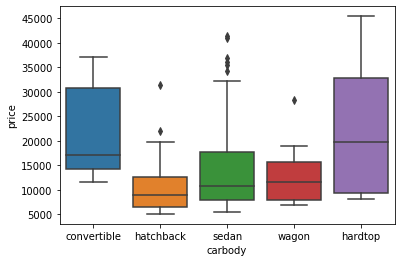

In [136]:
cat_visualisation('carbody')

<b>hardtop and convertible are very less in number. If I remove them from the dataset that would mean 
removing 7% of the already very small dataset. We have already seen from the EDA that carbody has no effect on pricing. Hence its better to remove the feature entirely</b>

In [137]:
dataset.drop(['carbody'],inplace=True,axis=1)

In [138]:
dataset.head()

,car_ID,symboling,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,avg_mpg
0,1,3,0,rwd,front,88.6,168.8,64.1,48.8,2548,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,24.0
1,2,3,0,rwd,front,88.6,168.8,64.1,48.8,2548,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,24.0
2,3,1,0,rwd,front,94.5,171.2,65.5,52.4,2823,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,22.5
3,4,2,1,fwd,front,99.8,176.6,66.2,54.3,2337,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,27.0
4,5,2,1,4wd,front,99.4,176.6,66.4,54.3,2824,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,20.0


In [139]:
dataset['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

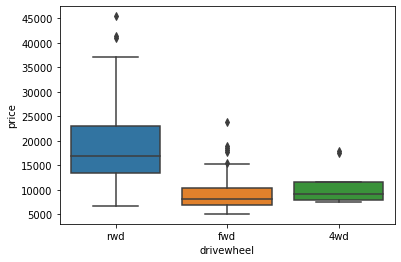

In [140]:
cat_visualisation('drivewheel')

<b>As 4wd pricing is similar to fwd, I'm clubbing them both as 4wd is very less in number and fwd has similar affect on price as 4wd</b>

In [141]:
dataset.replace({'drivewheel' : {'4wd':'fwd'}},inplace=True)

In [142]:
dataset['drivewheel'].value_counts()

fwd    129
rwd     76
Name: drivewheel, dtype: int64

In [143]:
# encoding the drivewheel column
dataset.replace({'drivewheel' : {'fwd':0,'rwd':1}},inplace=True)

In [144]:
cat_variables = ['symboling','doornumber','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']

In [145]:
dataset[cat_variables].head()

,symboling,doornumber,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,0,1,front,dohc,four,mpfi
1,3,0,1,front,dohc,four,mpfi
2,1,0,1,front,ohcv,six,mpfi
3,2,1,0,front,ohc,four,mpfi
4,2,1,0,front,ohc,five,mpfi


In [146]:
dataset['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

Removing dohcv and rotor as they are very less in number

In [147]:
dataset.drop(dataset.loc[dataset['enginetype']=='dohcv'].index, inplace=True)

In [148]:
dataset.drop(dataset.loc[dataset['enginetype']=='rotor'].index, inplace=True)

In [149]:
dataset['enginetype'].value_counts()

ohc     148
ohcf     15
ohcv     13
l        12
dohc     12
Name: enginetype, dtype: int64

In [150]:
dataset[cat_variables].head()

,symboling,doornumber,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,0,1,front,dohc,four,mpfi
1,3,0,1,front,dohc,four,mpfi
2,1,0,1,front,ohcv,six,mpfi
3,2,1,0,front,ohc,four,mpfi
4,2,1,0,front,ohc,five,mpfi


In [151]:
dataset['enginelocation'].value_counts()

front    197
rear       3
Name: enginelocation, dtype: int64

highly skewed. So better to remove this from the analysis

In [152]:
dataset.drop(['enginelocation'],inplace=True,axis=1)

In [153]:
dataset['fuelsystem'].value_counts()

mpfi    92
2bbl    66
idi     20
1bbl    11
spdi     9
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

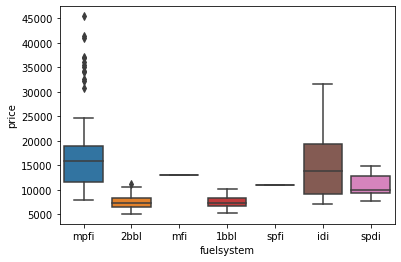

In [154]:
cat_visualisation('fuelsystem')

Removing mfi and spfi as they have just one observation

In [155]:
dataset.drop(dataset.loc[dataset['fuelsystem']=='mfi'].index, inplace=True)

In [156]:
dataset.drop(dataset.loc[dataset['fuelsystem']=='spfi'].index, inplace=True)

In [157]:
cat_variables = ['symboling',
 'doornumber',
 'drivewheel',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [158]:
dataset[cat_variables].head()

,symboling,doornumber,drivewheel,enginetype,cylindernumber,fuelsystem
0,3,0,1,dohc,four,mpfi
1,3,0,1,dohc,four,mpfi
2,1,0,1,ohcv,six,mpfi
3,2,1,0,ohc,four,mpfi
4,2,1,0,ohc,five,mpfi


In [159]:
dataset['cylindernumber'].value_counts()

four      157
six        24
five       11
eight       4
twelve      1
three       1
Name: cylindernumber, dtype: int64

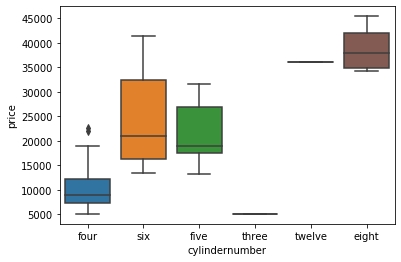

In [160]:
cat_visualisation('cylindernumber')

Categorising cylindernumber into bins

In [161]:
dataset['cylindernumber'] = dataset['cylindernumber'].apply(lambda x:'greater_than_4' if (x=='twelve'or x=='eight' or x=='five' or x=='six') else 'four_or_less')

In [162]:
dataset[cat_variables].head()

,symboling,doornumber,drivewheel,enginetype,cylindernumber,fuelsystem
0,3,0,1,dohc,four_or_less,mpfi
1,3,0,1,dohc,four_or_less,mpfi
2,1,0,1,ohcv,greater_than_4,mpfi
3,2,1,0,ohc,four_or_less,mpfi
4,2,1,0,ohc,greater_than_4,mpfi


In [163]:
# dummy variable for enginetype
dummy_enginetype = pd.get_dummies(dataset['enginetype'], drop_first = True)

In [164]:
dummy_enginetype.head()

,l,ohc,ohcf,ohcv
0,0,0,0,0
1,0,0,0,0
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0


In [165]:
# dummy variables for fuelsystem
dummy_fuelsystem = pd.get_dummies(dataset['fuelsystem'], drop_first = True)

In [166]:
dummy_fuelsystem.head()

,2bbl,idi,mpfi,spdi
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [167]:
# encoding cylindernumber
dataset.replace({'cylindernumber' : {'four_or_less':0,'greater_than_4':1}},inplace=True)

In [168]:
dataset = pd.concat([dataset,dummy_enginetype,dummy_fuelsystem],axis=1)

In [169]:
# creating the derived feature - avg_mpg
dataset['avg_mpg'] = (dataset['citympg']+dataset['highwaympg'])/2

In [170]:
dataset.head()

,car_ID,symboling,doornumber,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,...,price,avg_mpg,l,ohc,ohcf,ohcv,2bbl,idi,mpfi,spdi
0,1,3,0,1,88.6,168.8,64.1,48.8,2548,dohc,...,13495.0,24.0,0,0,0,0,0,0,1,0
1,2,3,0,1,88.6,168.8,64.1,48.8,2548,dohc,...,16500.0,24.0,0,0,0,0,0,0,1,0
2,3,1,0,1,94.5,171.2,65.5,52.4,2823,ohcv,...,16500.0,22.5,0,0,0,1,0,0,1,0
3,4,2,1,0,99.8,176.6,66.2,54.3,2337,ohc,...,13950.0,27.0,0,1,0,0,0,0,1,0
4,5,2,1,0,99.4,176.6,66.4,54.3,2824,ohc,...,17450.0,20.0,0,1,0,0,0,0,1,0


In [171]:
dataset.drop(['fuelsystem','enginetype'],axis=1,inplace=True)

In [172]:
dataset.columns

Index(['car_ID', 'symboling', 'doornumber', 'drivewheel', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'avg_mpg', 'l', 'ohc',
       'ohcf', 'ohcv', '2bbl', 'idi', 'mpfi', 'spdi'],
      dtype='object')

In [173]:
dataset.drop(['car_ID'],axis=1,inplace=True)

In [174]:
dataset.drop(['citympg','highwaympg'],axis=1,inplace=True)

In [175]:
dataset.head()

,symboling,doornumber,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,price,avg_mpg,l,ohc,ohcf,ohcv,2bbl,idi,mpfi,spdi
0,3,0,1,88.6,168.8,64.1,48.8,2548,0,130,...,13495.0,24.0,0,0,0,0,0,0,1,0
1,3,0,1,88.6,168.8,64.1,48.8,2548,0,130,...,16500.0,24.0,0,0,0,0,0,0,1,0
2,1,0,1,94.5,171.2,65.5,52.4,2823,1,152,...,16500.0,22.5,0,0,0,1,0,0,1,0
3,2,1,0,99.8,176.6,66.2,54.3,2337,0,109,...,13950.0,27.0,0,1,0,0,0,0,1,0
4,2,1,0,99.4,176.6,66.4,54.3,2824,1,136,...,17450.0,20.0,0,1,0,0,0,0,1,0


<h3> Using RFE </h3>

In [176]:
#Splitting the data into training and test set

df_train_RFE, df_test_RFE = train_test_split(dataset, train_size = 0.7, test_size = 0.3, random_state = 100)

In [177]:
# scaling the features
scaler_RFE = MinMaxScaler()

In [178]:
num_vars = ['wheelbase','carlength', 'carwidth', 'carheight','curbweight','enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower','peakrpm', 'avg_mpg', 'price']

df_train_RFE[num_vars] = scaler_RFE.fit_transform(df_train_RFE[num_vars])

df_train_RFE.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,symboling,doornumber,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,price,avg_mpg,l,ohc,ohcf,ohcv,2bbl,idi,mpfi,spdi
80,3,0,0,0.282799,0.476119,0.435897,0.133333,0.342126,0,0.184906,...,0.120178,0.328571,0,1,0,0,0,0,0,1
3,2,1,0,0.384840,0.529851,0.504274,0.541667,0.329325,0,0.181132,...,0.219254,0.342857,0,1,0,0,0,0,1,0
190,3,0,0,0.230321,0.367164,0.316239,0.300000,0.284329,0,0.181132,...,0.120699,0.328571,0,1,0,0,0,0,1,0
26,1,1,0,0.206997,0.241791,0.299145,0.233333,0.194337,0,0.109434,...,0.061839,0.557143,0,1,0,0,1,0,0,0
96,1,1,0,0.230321,0.361194,0.299145,0.558333,0.187355,0,0.135849,...,0.059108,0.542857,0,1,0,0,1,0,0,0


In [179]:
df_train_RFE.describe()

,symboling,doornumber,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,price,avg_mpg,l,ohc,ohcf,ohcv,2bbl,idi,mpfi,spdi
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,...,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,0.826087,0.565217,0.355072,0.351523,0.485291,0.471696,0.506039,0.410061,0.224638,0.250561,...,0.205967,0.376605,0.072464,0.710145,0.086957,0.065217,0.362319,0.108696,0.427536,0.043478
std,1.170894,0.497534,0.480279,0.176238,0.187332,0.187738,0.199731,0.206070,0.418864,0.164822,...,0.210094,0.186574,0.260199,0.455348,0.282798,0.247809,0.482421,0.312391,0.496523,0.204674
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.230321,0.366045,0.316239,0.350000,0.246509,0.000000,0.135849,...,0.066109,0.214286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.301749,0.477612,0.435897,0.525000,0.356672,0.000000,0.184906,...,0.123591,0.364286,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,1.000000,0.425656,0.600746,0.564103,0.641667,0.556439,0.000000,0.319811,...,0.282837,0.517857,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [180]:
# seperating target variable and feature variables
y_train_RFE = df_train_RFE.pop('price')
X_train_RFE = df_train_RFE

In [181]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [182]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train_RFE, y_train_RFE)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train_RFE, y_train_RFE)

In [183]:
list(zip(X_train_RFE.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 13),
 ('doornumber', False, 12),
 ('drivewheel', False, 9),
 ('wheelbase', False, 7),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', True, 1),
 ('curbweight', False, 10),
 ('cylindernumber', False, 3),
 ('enginesize', True, 1),
 ('boreratio', False, 11),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('avg_mpg', False, 2),
 ('l', False, 6),
 ('ohc', False, 5),
 ('ohcf', False, 8),
 ('ohcv', True, 1),
 ('2bbl', False, 14),
 ('idi', True, 1),
 ('mpfi', False, 15),
 ('spdi', False, 4)]

<b>Selected Variables - </b>

In [184]:
col = X_train_RFE.columns[rfe.support_]
col

Index(['carlength', 'carwidth', 'carheight', 'enginesize', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'ohcv', 'idi'],
      dtype='object')

## Lets perform VIF and p value analysis on these variables

In [185]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train_RFE[col]

In [186]:
X_train_rfe = sm.add_constant(X_train_rfe)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [187]:
X_train_rfe.head()

,const,carlength,carwidth,carheight,enginesize,stroke,compressionratio,horsepower,peakrpm,ohcv,idi
80,1.0,0.476119,0.435897,0.133333,0.184906,0.661905,0.03125,0.317757,0.551020,0,0
3,1.0,0.529851,0.504274,0.541667,0.181132,0.633333,0.18750,0.252336,0.551020,0,0
190,1.0,0.367164,0.316239,0.300000,0.181132,0.633333,0.09375,0.196262,0.551020,0,0
26,1.0,0.241791,0.299145,0.233333,0.109434,0.552381,0.15000,0.093458,0.551020,0,0
96,1.0,0.361194,0.299145,0.558333,0.135849,0.580952,0.15000,0.098131,0.428571,0,0


In [188]:
# Running the linear model
lm_rfe = sm.OLS(y_train_RFE,X_train_rfe).fit()  

In [189]:
#Let's see the summary of our linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     96.02
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           2.96e-54
Time:                        16:27:41   Log-Likelihood:                 168.15
No. Observations:                 138   AIC:                            -314.3
Df Residuals:                     127   BIC:                            -282.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1422      0.047  

In [190]:
# creating X_train_new to calculate VIFs
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [191]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,compressionratio,54.18
0,carlength,50.64
9,idi,41.73
1,carwidth,38.85
3,enginesize,34.15
6,horsepower,22.65
2,carheight,14.22
4,stroke,12.98
7,peakrpm,12.74
8,ohcv,2.02


In [192]:
# removing compressionratio as it has higher vif and p value
X_train_rfe.drop('compressionratio',axis=1,inplace=True)

In [193]:
X_train_rfe.head()

,const,carlength,carwidth,carheight,enginesize,stroke,horsepower,peakrpm,ohcv,idi
80,1.0,0.476119,0.435897,0.133333,0.184906,0.661905,0.317757,0.551020,0,0
3,1.0,0.529851,0.504274,0.541667,0.181132,0.633333,0.252336,0.551020,0,0
190,1.0,0.367164,0.316239,0.300000,0.181132,0.633333,0.196262,0.551020,0,0
26,1.0,0.241791,0.299145,0.233333,0.109434,0.552381,0.093458,0.551020,0,0
96,1.0,0.361194,0.299145,0.558333,0.135849,0.580952,0.098131,0.428571,0,0


In [194]:
# Running the linear model without the removed variable
lm_rfe_2 = sm.OLS(y_train_RFE,X_train_rfe).fit()   

In [195]:
#Let's see the summary of our linear model
print(lm_rfe_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     107.0
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           3.63e-55
Time:                        16:27:42   Log-Likelihood:                 167.86
No. Observations:                 138   AIC:                            -315.7
Df Residuals:                     128   BIC:                            -286.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1626      0.038     -4.256      0.0

In [196]:
# dropping compression ratio from X_train_new to compute VIF
X_train_new.drop('compressionratio',axis=1,inplace=True)

In [197]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carlength,50.48
1,carwidth,38.28
3,enginesize,31.70
5,horsepower,21.14
2,carheight,13.61
4,stroke,12.97
6,peakrpm,8.80
7,ohcv,2.01
8,idi,1.94


In [198]:
# removing carlength as it has higher p value and VIF
X_train_rfe.drop('carlength',axis=1,inplace=True)

In [199]:
# Running the linear model
lm_rfe_3 = sm.OLS(y_train_RFE,X_train_rfe).fit()   

In [200]:
#Let's see the summary of our linear model
print(lm_rfe_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     115.2
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           5.94e-55
Time:                        16:27:43   Log-Likelihood:                 164.71
No. Observations:                 138   AIC:                            -311.4
Df Residuals:                     129   BIC:                            -285.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1669      0.039     -4.294      0.0

In [201]:
X_train_new.drop('carlength',axis=1,inplace=True)

In [202]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,31.51
0,carwidth,21.15
4,horsepower,20.02
3,stroke,12.97
5,peakrpm,8.49
1,carheight,8.29
6,ohcv,1.92
7,idi,1.91


In [203]:
# removing carwidth as engine size has a better p value
X_train_rfe.drop('carwidth',axis=1,inplace=True)

In [204]:
# Running the linear model
lm_rfe_4 = sm.OLS(y_train_RFE,X_train_rfe).fit()   

In [205]:
#Let's see the summary of our linear model
print(lm_rfe_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     129.2
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           2.25e-55
Time:                        16:27:43   Log-Likelihood:                 163.09
No. Observations:                 138   AIC:                            -310.2
Df Residuals:                     130   BIC:                            -286.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1561      0.039     -4.036      0.0

In [206]:
X_train_new.drop('carwidth',axis=1,inplace=True)

In [207]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,27.91
3,horsepower,19.80
2,stroke,12.76
4,peakrpm,8.38
0,carheight,5.94
5,ohcv,1.91
6,idi,1.80


In [208]:
# removing horsepower as enginesize has a better p value
X_train_rfe.drop('horsepower',axis=1,inplace=True)

In [209]:
# Running the linear model
lm_rfe_5 = sm.OLS(y_train_RFE,X_train_rfe).fit()   

In [210]:
#Let's see the summary of our linear model
print(lm_rfe_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     143.4
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           4.52e-55
Time:                        16:27:44   Log-Likelihood:                 159.65
No. Observations:                 138   AIC:                            -305.3
Df Residuals:                     131   BIC:                            -284.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1631      0.039     -4.138      0.0

In [211]:
X_train_new.drop('horsepower',axis=1,inplace=True)

In [212]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,stroke,11.62
3,peakrpm,5.81
1,enginesize,5.56
0,carheight,5.52
4,ohcv,1.80
5,idi,1.79


In [213]:
# dropping stroke as it has a high vif
X_train_rfe.drop('stroke',axis=1,inplace=True)

In [214]:
# Running the linear model
lm_rfe_6 = sm.OLS(y_train_RFE,X_train_rfe).fit()   

In [215]:
#Let's see the summary of our linear model
print(lm_rfe_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     147.6
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           2.86e-52
Time:                        16:27:44   Log-Likelihood:                 150.12
No. Observations:                 138   AIC:                            -288.2
Df Residuals:                     132   BIC:                            -270.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2603      0.035     -7.469      0.0

In [216]:
X_train_new.drop('stroke',axis=1,inplace=True)

In [217]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carheight,4.81
1,enginesize,4.45
2,peakrpm,3.41
3,ohcv,1.75
4,idi,1.53


<b>The model seems good. The p value and vifs are low. Lets do residual analysis</b>

In [218]:
X_train_rfe.head()

,const,carheight,enginesize,peakrpm,ohcv,idi
80,1.0,0.133333,0.184906,0.551020,0,0
3,1.0,0.541667,0.181132,0.551020,0,0
190,1.0,0.300000,0.181132,0.551020,0,0
26,1.0,0.233333,0.109434,0.551020,0,0
96,1.0,0.558333,0.135849,0.428571,0,0


In [219]:
# predicting price from the training set
y_train_price_rfe = lm_rfe_6.predict(X_train_rfe)

<b>Checking if error terms are normally distributed with mean zero</b>

Text(0.5, 0, 'Errors')

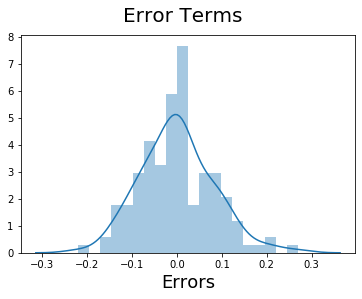

In [220]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train_RFE - y_train_price_rfe), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

<b>Checking if the error terms are independent of each other</b>

Text(0, 0.5, 'Errors')

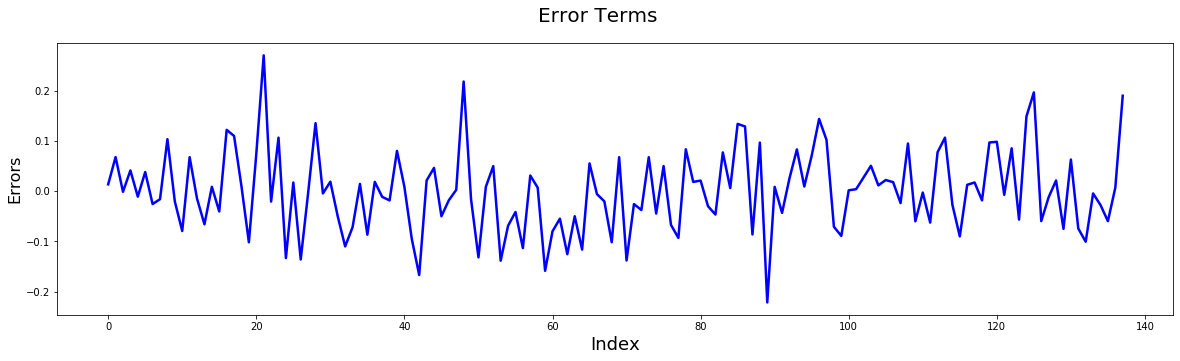

In [221]:
# Error terms
c = [i for i in range(0,138,1)]
fig = plt.figure(figsize=(20,5))
plt.plot(c,(y_train_RFE - y_train_price_rfe), color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Errors', fontsize=16)                # Y-label

<b>No pattern is observed and hence it satisfies the condition</b>

<b>Checking for Homoscedasticity</b>

Text(0, 0.5, 'Errors')

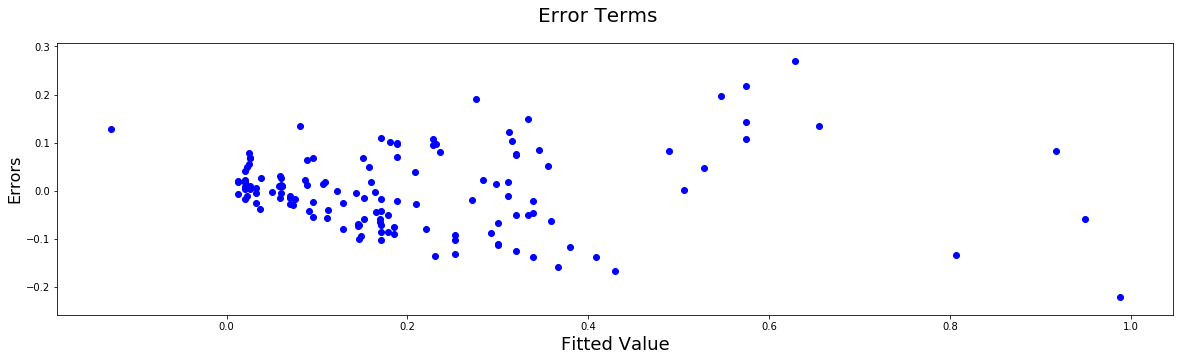

In [222]:
fig = plt.figure(figsize=(20,5))
plt.scatter(y_train_price_rfe,(y_train_RFE - y_train_price_rfe), color="blue")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Fitted Value', fontsize=18)                      # X-label
plt.ylabel('Errors', fontsize=16)                          # X-label

There seems to be an increase in variance initially but it later becomes constant. Lets see if this has any effect on the model predictions on test data

<b>Evaluating the model using test data</b>

In [223]:
num_vars = ['wheelbase','carlength', 'carwidth', 'carheight','curbweight','enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower','peakrpm', 'avg_mpg', 'price']

df_test_RFE[num_vars] = scaler_RFE.transform(df_test_RFE[num_vars])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [224]:
df_test_RFE.head()

,symboling,doornumber,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,price,avg_mpg,l,ohc,ohcf,ohcv,2bbl,idi,mpfi,spdi
133,2,1,0,0.364431,0.679104,0.529915,0.691667,0.468192,0,0.226415,...,0.175066,0.271429,0,1,0,0,0,0,1,0
110,0,1,1,0.804665,0.862687,0.692308,0.908333,0.753297,0,0.343396,...,0.217020,0.285714,1,0,0,0,0,1,0,0
105,3,0,1,0.137026,0.441791,0.649573,0.158333,0.640419,1,0.452830,...,0.361973,0.142857,0,0,0,1,0,0,1,0
98,2,0,0,0.247813,0.317910,0.299145,0.458333,0.201707,0,0.135849,...,0.077727,0.542857,0,1,0,0,1,0,0,0
117,0,1,1,0.623907,0.680597,0.683761,0.683333,0.636928,0,0.275472,...,0.323519,0.171429,1,0,0,0,0,0,1,0


In [225]:
# seperating the target variable and the features
y_test_RFE = df_test_RFE.pop('price')
X_test_RFE = df_test_RFE

In [226]:
X_train_new.head()

,carheight,enginesize,peakrpm,ohcv,idi
80,0.133333,0.184906,0.551020,0,0
3,0.541667,0.181132,0.551020,0,0
190,0.300000,0.181132,0.551020,0,0
26,0.233333,0.109434,0.551020,0,0
96,0.558333,0.135849,0.428571,0,0


In [227]:
# Now let's use our model to make predictions.

# Creating X_test_new_RFE dataframe by dropping variables from X_test
X_test_new_RFE = X_test_RFE[X_train_new.columns]

# Adding a constant variable 
X_test_new_RFE = sm.add_constant(X_test_new_RFE)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [228]:
X_test_new_RFE.head()

,const,carheight,enginesize,peakrpm,ohcv,idi
133,1.0,0.691667,0.226415,0.448980,0,0
110,1.0,0.908333,0.343396,0.000000,0,1
105,1.0,0.158333,0.452830,0.428571,1,0
98,1.0,0.458333,0.135849,0.428571,0,0
117,1.0,0.683333,0.275472,0.591837,0,0


In [229]:
# Making predictions
y_pred_rfe = lm_rfe_6.predict(X_test_new_RFE)

In [230]:
#evaluation dataframe
y_pred_rfe_df = pd.DataFrame({'y_test_RFE':y_test_RFE,'y_pred_rfe':y_pred_rfe})

Text(6.799999999999997, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

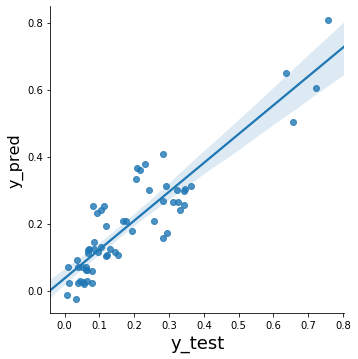

In [231]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
sns.lmplot(x='y_test_RFE',y='y_pred_rfe',data=y_pred_rfe_df)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [232]:
r_squared_rfe = r2_score(y_test_RFE, y_pred_rfe)

In [233]:
r_squared_rfe

0.8075422991684423

In [234]:
0.848-0.8075

0.04049999999999998

<b> The R square value of 0.807 from test set is just 0.04 less than the R square value of training set. Hence the model is generalised well</b>

<h3>Final Approach - Combining variables obtained from the first two approaches in model building</h3>

In [235]:
dataset_final = pd.read_csv('CarPrice_Assignment.csv')

In [236]:
dataset_final['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [237]:
# dropping 4wd as very less in count
dataset_final.drop(dataset_final.loc[dataset_final['drivewheel']=='4wd'].index, inplace=True)

In [238]:
dataset_final['drivewheel'].value_counts()

fwd    120
rwd     76
Name: drivewheel, dtype: int64

In [239]:
# encoding
dataset_final.replace({'drivewheel' : {'fwd':0,'rwd':1}},inplace=True)

In [240]:
dataset_final['cylindernumber'].value_counts()

four      152
six        24
five        9
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [241]:
# binning the levels
dataset_final['cylindernumber'] = dataset_final['cylindernumber'].apply(lambda x:'greater_than_4' if (x=='twelve'or x=='eight' or x=='five' or x=='six') else 'four_or_less')

In [242]:
dataset_final['cylindernumber'].value_counts()

four_or_less      157
greater_than_4     39
Name: cylindernumber, dtype: int64

In [243]:
# encoding
dataset_final.replace({'cylindernumber':{'four_or_less':0,'greater_than_4':1}},inplace=True)

In [244]:
dataset_final['cylindernumber'].value_counts()

0    157
1     39
Name: cylindernumber, dtype: int64

In [245]:
# variables from the above 2 models
variables_to_take = ['carheight','enginesize','peakrpm','citympg','drivewheel','cylindernumber','price']

In [246]:
dataset_final = dataset_final[variables_to_take]

In [247]:
# splitting the data into training and testing
df_train_final, df_test_final = train_test_split(dataset_final, train_size = 0.7, test_size = 0.3, random_state = 100)

In [248]:
# scaling the variables
scaler_final = MinMaxScaler()

In [249]:
numeric_vars = ['carheight','enginesize','peakrpm','citympg','price']
df_train_final[numeric_vars] = scaler_final.fit_transform(df_train_final[numeric_vars])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [250]:
df_train_final.head()

,carheight,enginesize,peakrpm,citympg,drivewheel,cylindernumber,price
75,0.583333,0.298113,0.346939,0.176471,1,0,0.282632
3,0.541667,0.181132,0.551020,0.323529,0,0,0.219254
190,0.300000,0.181132,0.551020,0.323529,0,0,0.120699
28,1.000000,0.230189,0.346939,0.323529,0,0,0.094409
91,0.558333,0.135849,0.428571,0.529412,0,0,0.038007


In [251]:
# seperating target variable and feature variables
y_train_final = df_train_final.pop('price')
X_train_final = df_train_final

In [252]:
# Add a constant
X_train_lm_final = sm.add_constant(X_train_final)

# Create a first fitted model
lr_final = sm.OLS(y_train_final, X_train_lm_final).fit()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [253]:
# Print a summary of the linear regression model obtained
print(lr_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     117.5
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           4.95e-50
Time:                        16:27:51   Log-Likelihood:                 155.01
No. Observations:                 137   AIC:                            -296.0
Df Residuals:                     130   BIC:                            -275.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1018      0.051     -1.

In [254]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_final.columns
vif['VIF'] = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,6.83
0,carheight,5.62
3,citympg,4.47
2,peakrpm,3.70
5,cylindernumber,2.71
4,drivewheel,2.53


In [255]:
# dropping citympg as it has a higher p value
X_train_final.drop('citympg',inplace=True,axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [256]:
X_train_final.head()

,carheight,enginesize,peakrpm,drivewheel,cylindernumber
75,0.583333,0.298113,0.346939,1,0
3,0.541667,0.181132,0.551020,0,0
190,0.300000,0.181132,0.551020,0,0
28,1.000000,0.230189,0.346939,0,0
91,0.558333,0.135849,0.428571,0,0


In [257]:
X_train_lm_final.drop('citympg',inplace=True,axis=1)

In [258]:
# Create the fitted model
lr_final_2 = sm.OLS(y_train_final, X_train_lm_final).fit()

In [259]:
# Print a summary of the linear regression model obtained
print(lr_final_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     139.7
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           9.86e-51
Time:                        16:27:51   Log-Likelihood:                 154.04
No. Observations:                 137   AIC:                            -296.1
Df Residuals:                     131   BIC:                            -278.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1550      0.033     -4.

In [260]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_final.columns
vif['VIF'] = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,6.77
0,carheight,4.16
2,peakrpm,2.85
4,cylindernumber,2.57
3,drivewheel,2.30


<b>The model has low vifs and p value. Lets do residual analysis</b>

In [261]:
df_test_final.head()

,carheight,enginesize,peakrpm,citympg,drivewheel,cylindernumber,price
99,54.7,120,5200,27,0,0,8949.0
94,54.5,97,5200,31,0,0,7299.0
175,53.9,122,4200,27,0,0,9988.0
92,54.5,97,5200,31,0,0,6849.0
71,56.5,234,4750,16,1,1,34184.0


In [262]:
# predicting price from the training set
y_train_price_final = lr_final_2.predict(X_train_lm_final)

<b>Checking if error terms are normally distributed with mean zero</b>

Text(0.5, 0, 'Errors')

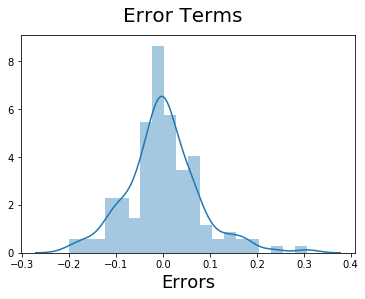

In [263]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train_final - y_train_price_final), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

<b>Checking if the error terms are independent of each other</b>

Text(0, 0.5, 'Errors')

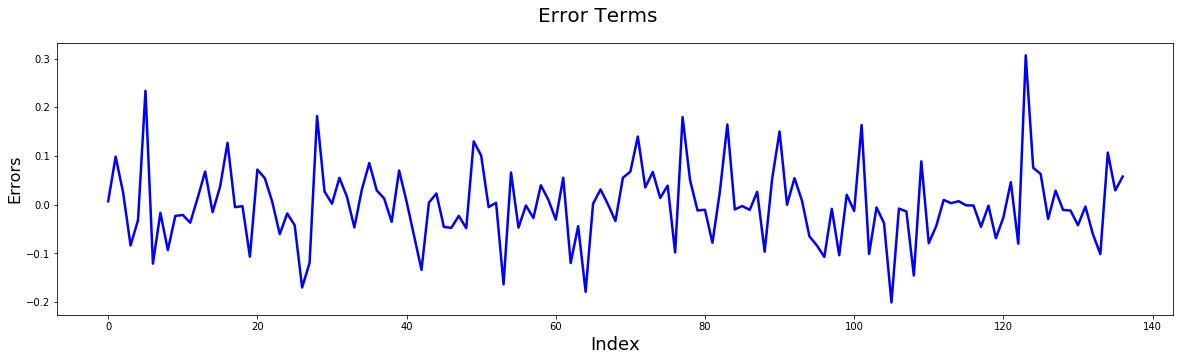

In [264]:
# Error terms
c = [i for i in range(0,137,1)]
fig = plt.figure(figsize=(20,5))
plt.plot(c,(y_train_final - y_train_price_final), color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Errors', fontsize=16)                # Y-label

<b>No pattern is observed and hence it satisfies the condition</b>

<b>Checking for Homoscedasticity</b>

Text(0, 0.5, 'Errors')

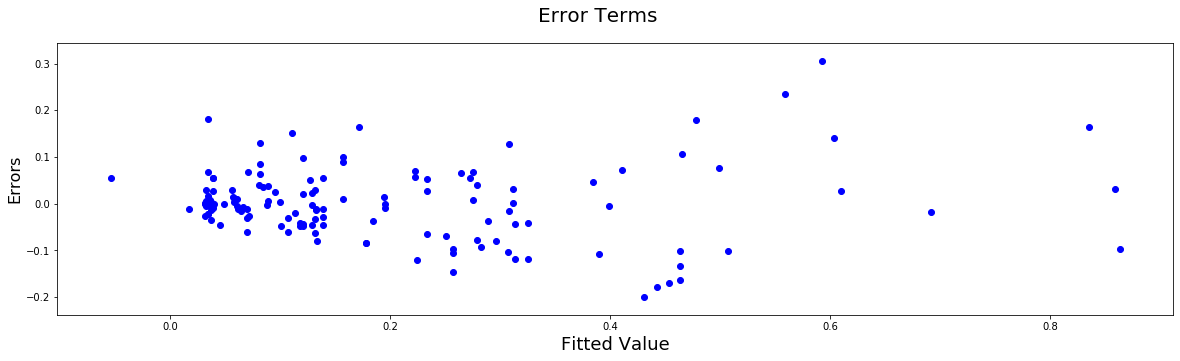

In [265]:
fig = plt.figure(figsize=(20,5))
plt.scatter(y_train_price_final,(y_train_final - y_train_price_final), color="blue")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Fitted Value', fontsize=18)                      # X-label
plt.ylabel('Errors', fontsize=16)                          # X-label

Seems good

<h3>Evaluating the model on testing dataset</h3>

In [266]:
# scaling the testing data
numeric_vars = ['carheight','enginesize','peakrpm','citympg','price']
df_test_final[numeric_vars] = scaler_final.transform(df_test_final[numeric_vars])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [267]:
df_test_final.head()

,carheight,enginesize,peakrpm,citympg,drivewheel,cylindernumber,price
99,0.575000,0.222642,0.428571,0.411765,0,0,0.095105
94,0.558333,0.135849,0.428571,0.529412,0,0,0.054143
175,0.508333,0.230189,0.020408,0.411765,0,0,0.120898
92,0.558333,0.135849,0.428571,0.529412,0,0,0.042972
71,0.725000,0.652830,0.244898,0.088235,1,1,0.721563


In [268]:
df_test_final.drop('citympg',axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [269]:
y_test_final = df_test_final.pop('price')
X_test_final = df_test_final

In [270]:
X_test_final.head()

,carheight,enginesize,peakrpm,drivewheel,cylindernumber
99,0.575000,0.222642,0.428571,0,0
94,0.558333,0.135849,0.428571,0,0
175,0.508333,0.230189,0.020408,0,0
92,0.558333,0.135849,0.428571,0,0
71,0.725000,0.652830,0.244898,1,1


In [271]:
X_test_final = sm.add_constant(X_test_final)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [272]:
y_test_pred_final = lr_final_2.predict(X_test_final)

In [273]:
r2_score(y_test_final,y_test_pred_final)

0.8143674112848677

<h3>R square of 0.814 on testing data is very similar to the one on training dataset and hence the model is well generalised.</h3>

In [274]:
y_final_scores = pd.DataFrame({'y_test_final':y_test_final,'y_test_pred':y_test_pred_final})

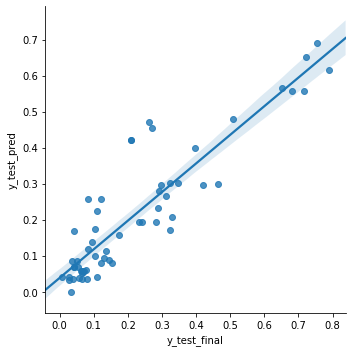

In [275]:
sns.lmplot(x='y_test_final',y='y_test_pred',data=y_final_scores)

### INFERENCES - 

<b>All the 3 models have a similar R square of around 0.80. Lets see the variables which affect the pricing and by how much - </b>

The first model chose the following parameters 

In [276]:
lr_8.params

const            -0.065249
enginesize        0.959778
drivewheel        0.047944
cylindernumber    0.105951
ohcv             -0.126694
dtype: float64

<b>Inferences from 1st Model - </b><br><br>
<b>So Engine Size contributes the highest. A 1 unit increase in Engine size <font color='red'>keeping the other variables constant</font> increases the price by 0.95 units.</b><br><br>
<b>Next is cylinder number. If more than 4 cylinders are used then the price increases by 0.10 as compared to when 4 or less cyclinders are used</b><br><br>
<b>If the engine type ohcv is used then the price decreases by 0.12 units compared to when the engine type dohc is used</b><br><br>
<b>Lastly a rear wheel drive car has 0.04 increased pricing as compared to a forward wheel drive car.</b>

The second model chose the following parameters - 

In [277]:
lm_rfe_6.params

const        -0.260321
carheight     0.121844
enginesize    1.301192
peakrpm       0.199447
ohcv         -0.122015
idi           0.062064
dtype: float64

<b>Inferences from the 2nd Model - <br><br>
    
<b>A unit increase in Engine size keeping the other variables constant leads to  1.3 unit increase in pricing.</b><br><br>
<b>A unit increase in car height keeping the other variables constant increases the price by 0.12 units</b><br><br>
<b>A unit increase in peak rpm keeping other variables constant increases the price by 0.199 units</b><br><br>
<b>If the engine type ohcv is used then the price decreases by 0.12 units compared to when the engine type dohc is used</b><br><br><b>Lastly using idi fuel system increases the price by 0.062 as compared to when 1bbl fuel system is used<b>


The third model chose the following parameters - 

In [278]:
lr_final_2.params

const            -0.155042
carheight         0.104191
enginesize        0.781633
peakrpm           0.140871
drivewheel        0.087989
cylindernumber    0.099516
dtype: float64

<b>Inferences from the 3rd Model - <br><br>
    
<b>A unit increase in Engine size keeping the other variables constant leads to  0.78 unit increase in pricing.</b><br><br>
<b>A unit increase in car height keeping the other variables constant increases the price by 0.10 units</b><br><br>
<b>A unit increase in peak rpm keeping other variables constant increases the price by 0.14 units</b><br><br>
<b>A rear wheel drive car has 0.08 increased pricing as compared to a forward wheel drive car.</b><br><br>
<b>Lastly If more than 4 cylinders are used then the price increases by 0.099 as compared to when 4 or less cyclinders are used<b>


<font color='red'><b>The R squared for the 3rd Model was the greatest - 0.814 (on test set)<b></font>